In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time


# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, ClassicalRegister, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi 
from qiskit.extensions import UnitaryGate
from qiskit.extensions import HamiltonianGate
from qiskit.circuit.library import PhaseEstimation
from qiskit.algorithms import HamiltonianPhaseEstimation
 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# import basic plot tools
from qiskit.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2023-02-21 15:11:09,089: Credentials are already in use. The existing account in the session will be replaced.


In [37]:
H =    [[14.79557413, -0.0256,     -0.0256,     -0.0256    ],
         [-0.0256,     17.90125377,  0.,          0.        ],
         [-0.0256,      0.,         13.13766616,  0.        ],
         [-0.0256,      0.,          0.,         13.41269882]]


In [38]:
U = HamiltonianGate(H,2*np.pi,label="CU") #
print(U)

Instruction(name='hamiltonian', num_qubits=2, num_clbits=0, params=[array([[14.79557413+0.j, -0.0256    +0.j, -0.0256    +0.j,
        -0.0256    +0.j],
       [-0.0256    +0.j, 17.90125377+0.j,  0.        +0.j,
         0.        +0.j],
       [-0.0256    +0.j,  0.        +0.j, 13.13766616+0.j,
         0.        +0.j],
       [-0.0256    +0.j,  0.        +0.j,  0.        +0.j,
        13.41269882+0.j]]), 6.283185307179586])


In [39]:
#HamiltonianPhaseEstimation(U)

In [40]:
qpe = QuantumCircuit(8, 6)
#qpe.draw(scale=2)

In [41]:
for qubit in range(7):
    qpe.h(qubit)
#qpe.draw(scale=2)

In [42]:
#PhaseEstimation(3,U)

In [43]:
CU = U.control(label="control")
print(CU)

Instruction(name='chamiltonian', num_qubits=3, num_clbits=0, params=[array([[14.79557413+0.j, -0.0256    +0.j, -0.0256    +0.j,
        -0.0256    +0.j],
       [-0.0256    +0.j, 17.90125377+0.j,  0.        +0.j,
         0.        +0.j],
       [-0.0256    +0.j,  0.        +0.j, 13.13766616+0.j,
         0.        +0.j],
       [-0.0256    +0.j,  0.        +0.j,  0.        +0.j,
        13.41269882+0.j]]), 6.283185307179586])


In [44]:
repetitions = 1
#CU = U#.to_gate().control(1)
for counting_qubit in range(6):
    for i in range(repetitions):
        qpe.append(CU,[counting_qubit,6,7])
        #qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
#qpe.draw(scale=1.5)

In [45]:
#straight from the tutorial:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [46]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 6)
# Measure
qpe.barrier()
for n in range(6):
    qpe.measure(n,n)

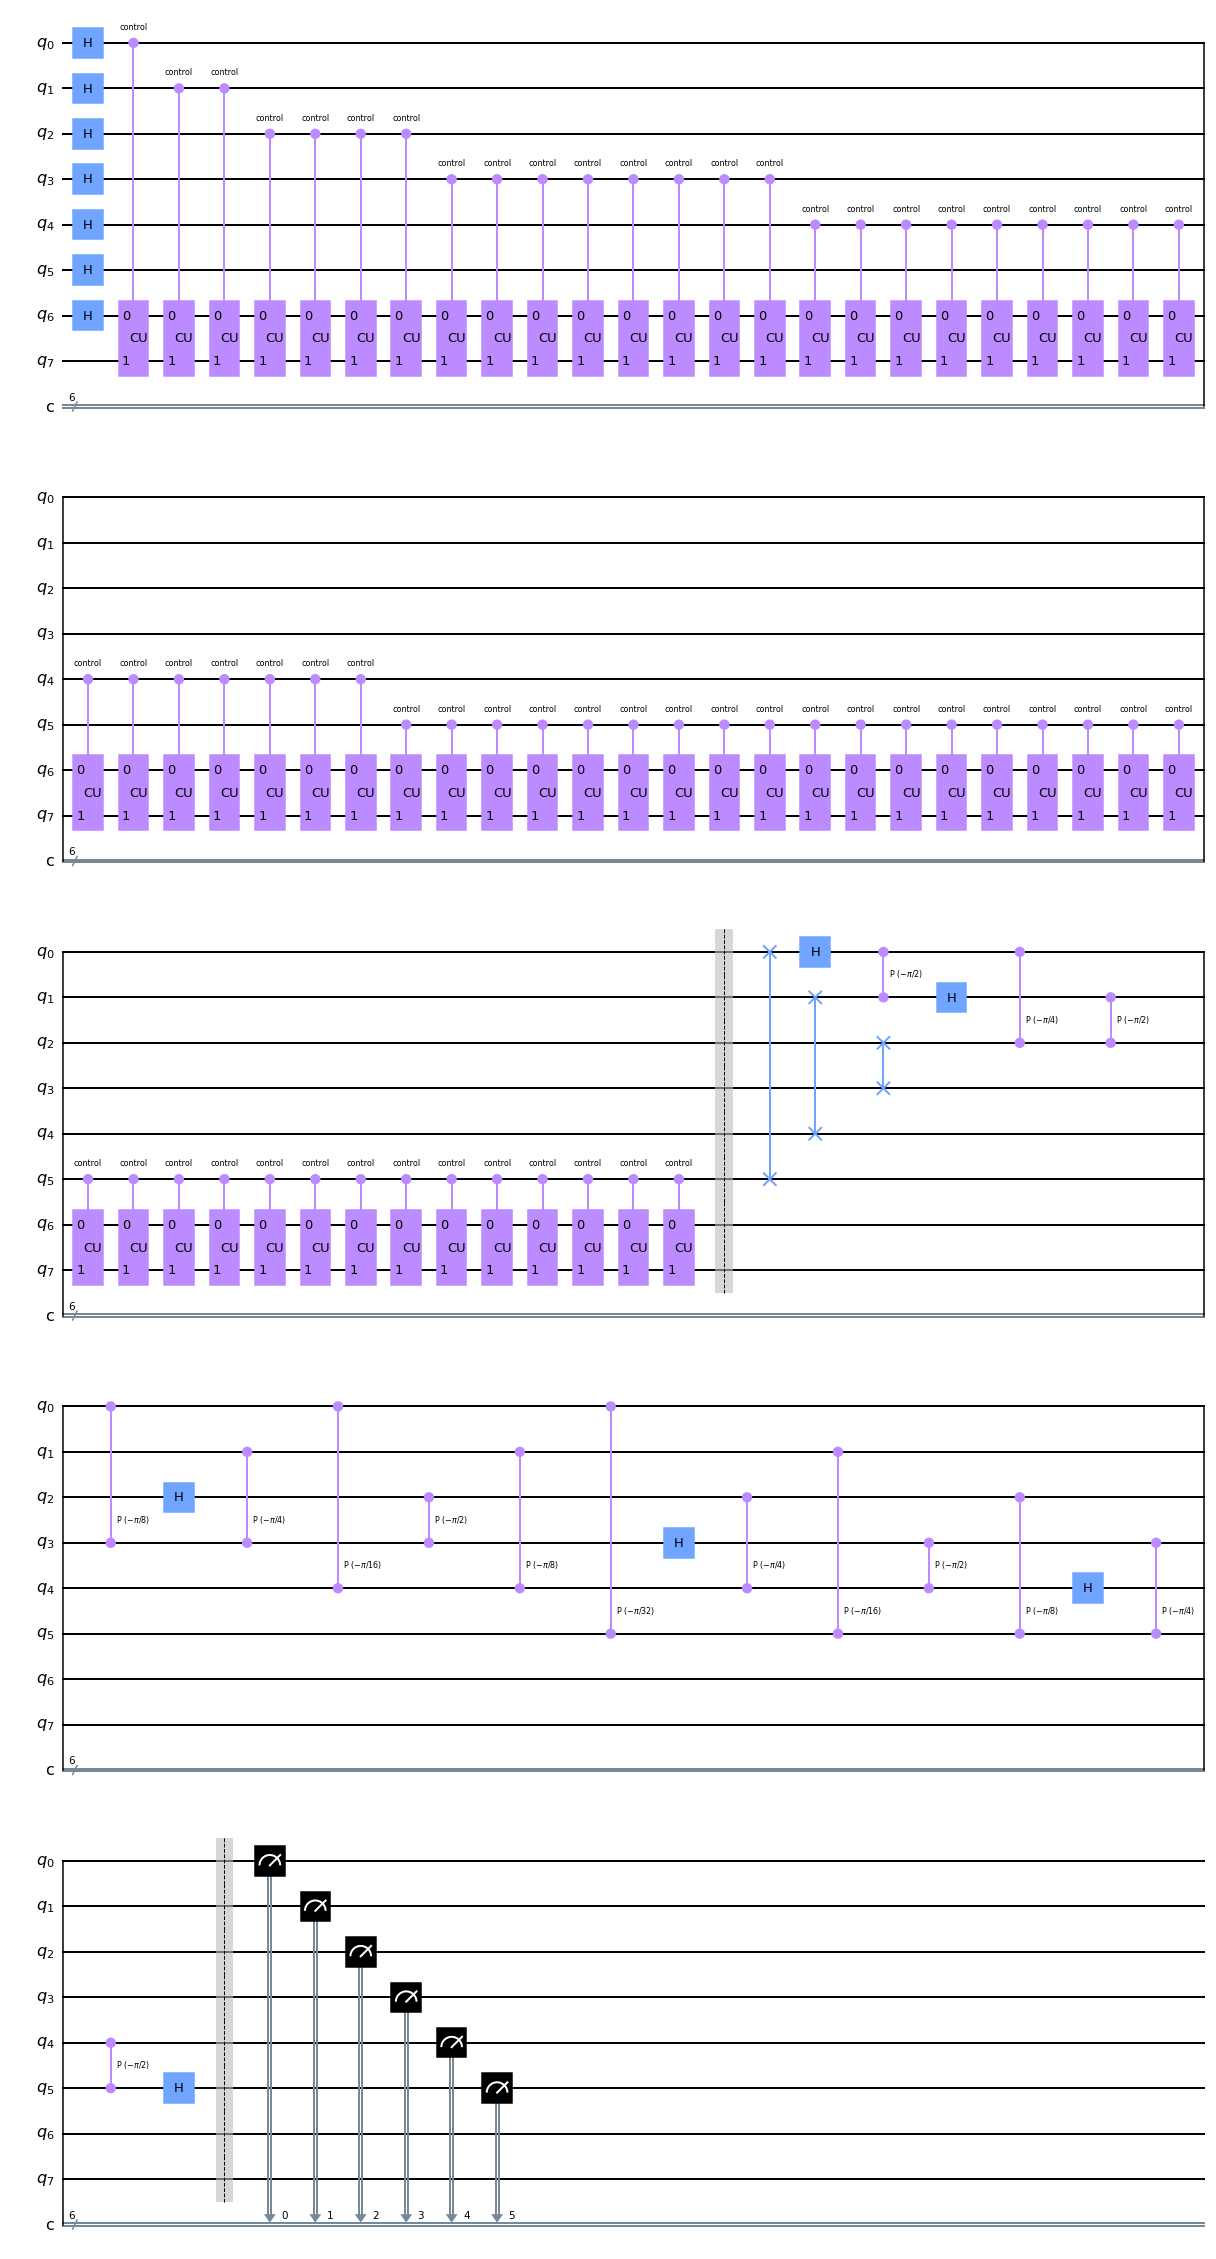

In [47]:
qpe.draw()

--- 0.20124387741088867 seconds ---


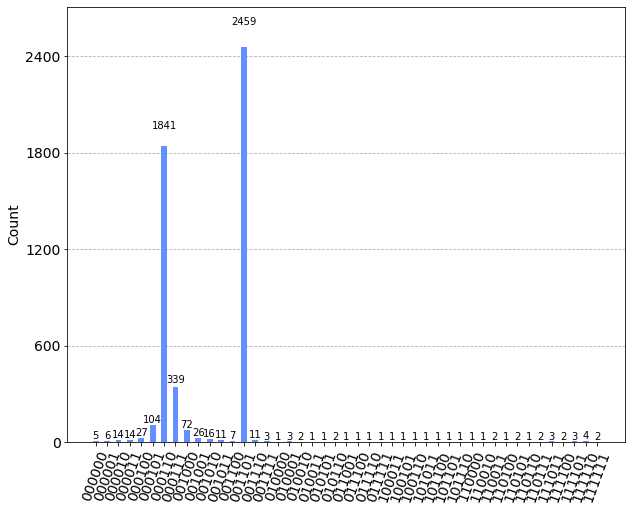

In [48]:
start_time = time.time()
aer_sim = Aer.get_backend('aer_simulator')
shots = 5000#2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
print("--- %s seconds ---" % (time.time() - start_time))
plot_histogram(answer,figsize=(10,8))


In [49]:
print(answer)

{'011110': 1, '010110': 2, '111111': 2, '110101': 2, '101101': 1, '010010': 2, '100101': 1, '010101': 1, '100110': 1, '010000': 1, '110000': 1, '110100': 1, '110110': 1, '000010': 14, '001110': 11, '000101': 104, '001001': 26, '000100': 27, '101110': 1, '001010': 16, '000011': 14, '000111': 339, '110011': 2, '111011': 3, '000110': 1841, '000001': 6, '010001': 3, '111110': 4, '110010': 1, '011100': 1, '111100': 2, '011001': 1, '000000': 5, '001101': 2459, '101011': 1, '110111': 2, '001000': 72, '111101': 3, '001100': 7, '001011': 11, '010011': 1, '011111': 1, '101100': 1, '001111': 3, '100011': 1}


In [50]:
print(max(answer, key=answer.get))

001101


In [27]:
print(sorted(answer, key=answer.get, reverse=True)[0:8])

['000111100', '001000110', '101100011', '101100010', '111110001', '001000101', '111110000', '001000111']


In [28]:
myList = sorted(answer, key=answer.get, reverse=True)[0:8]
output_list = []
for element in myList:
    value = int(element,2)
    output_list.append(value)
print("The input list is:", myList)
print("The output list is:", sorted(output_list))

The input list is: ['000111100', '001000110', '101100011', '101100010', '111110001', '001000101', '111110000', '001000111']
The output list is: [60, 69, 70, 71, 354, 355, 496, 497]
